<a href="https://colab.research.google.com/github/lucky7171/data-Science-projects/blob/starlet/student%20predictive%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import csv
import io
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

# Sample data (replace this with your actual data)
raw_data = """
23,68,Low,Low,No,8,91,Medium,Yes,5,Low,Medium,Public,Negative,5,No,Postgraduate,Near,Female,66
18,74,Medium,Low,Yes,6,67,High,Yes,2,Low,High,Public,Neutral,2,No,High School,Near,Male,64
27,79,Medium,Low,No,6,65,Low,Yes,0,Medium,Medium,Private,Negative,2,No,College,Near,Male,66
"""

# Define column headers
headers = [
    "Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources",
    "Extracurricular_Activities", "Sleep_Hours", "Previous_Scores",
    "Motivation_Level", "Internet_Access", "Tutoring_Sessions", "Family_Income",
    "Teacher_Quality", "School_Type", "Peer_Influence", "Physical_Activity",
    "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home",
    "Gender", "Exam_Score"
]

# Function to clean and standardize data
def clean_data(row):
    cleaned = []
    for i, value in enumerate(row):
        value = value.strip()
        if i in [0, 1, 5, 6, 9, 14, 19]:  # Numeric columns
            cleaned.append(value if value.isdigit() else '')
        elif value.lower() in ['yes', 'no']:
            cleaned.append(value.capitalize())
        elif value.lower() in ['low', 'medium', 'high']:
            cleaned.append(value.capitalize())
        else:
            cleaned.append(value)
    return cleaned

# Process the data
cleaned_data = []
for line in raw_data.strip().split('\n'):
    row = line.split(',')
    if len(row) == 20:  # Ensure row has correct number of columns
        cleaned_data.append(clean_data(row))

# Write to CSV
output = io.StringIO()
writer = csv.writer(output)
writer.writerow(headers)
writer.writerows(cleaned_data)

# Print the result (in a real scenario, you'd save this to a file)
print(output.getvalue())

Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
23,68,Low,Low,No,8,91,Medium,Yes,5,Low,Medium,Public,Negative,5,No,Postgraduate,Near,Female,66
18,74,Medium,Low,Yes,6,67,High,Yes,2,Low,High,Public,Neutral,2,No,High School,Near,Male,64
27,79,Medium,Low,No,6,65,Low,Yes,0,Medium,Medium,Private,Negative,2,No,College,Near,Male,66



In [8]:
with open('cleaned_data.csv', 'w', newline='') as f:
    f.write(output.getvalue())

<ipython-input-10-15fa743d2766>:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



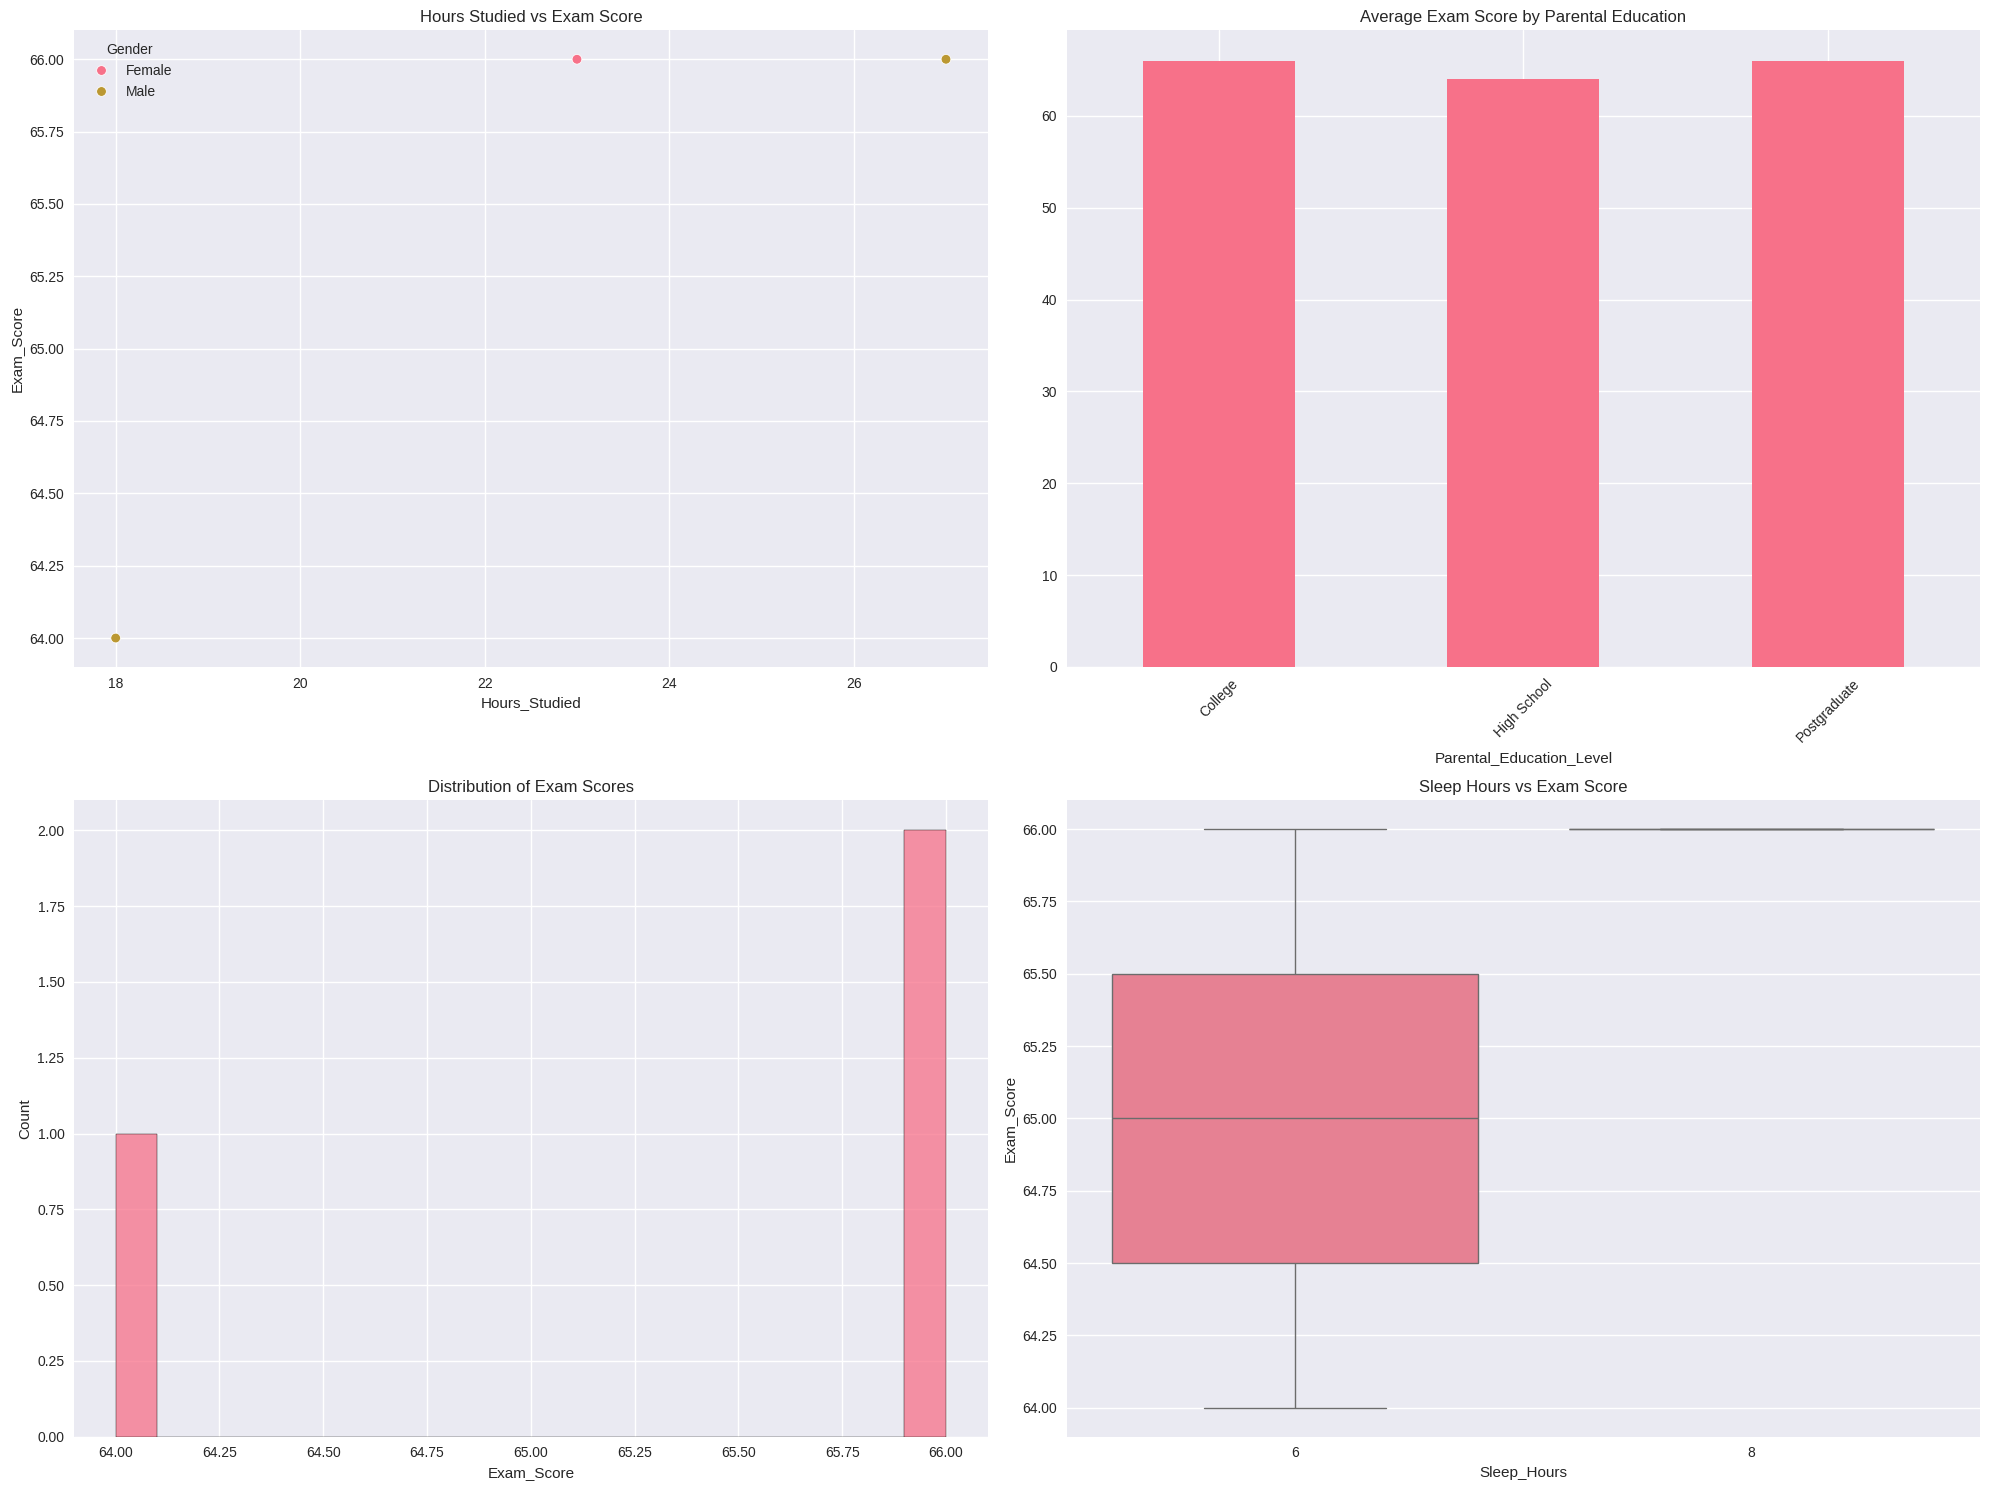

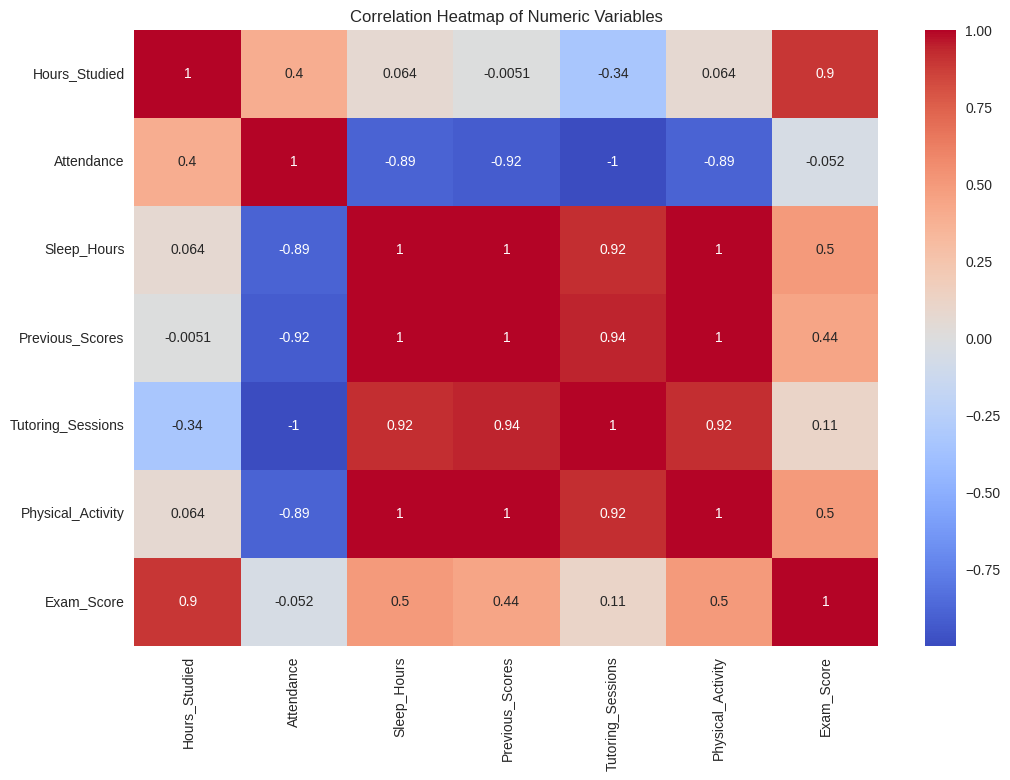

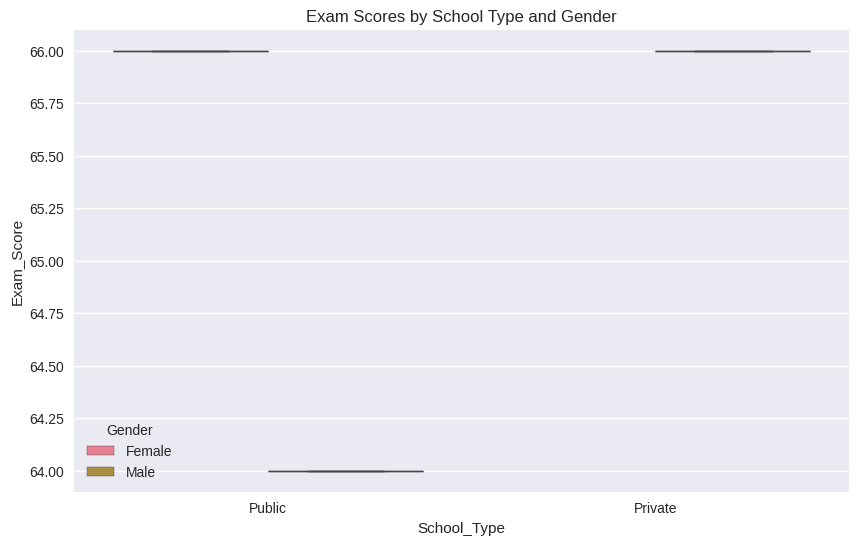

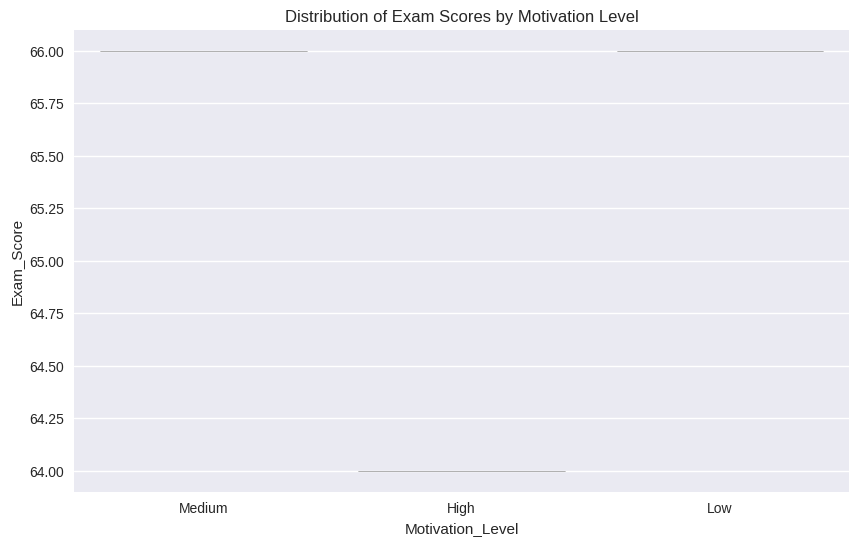

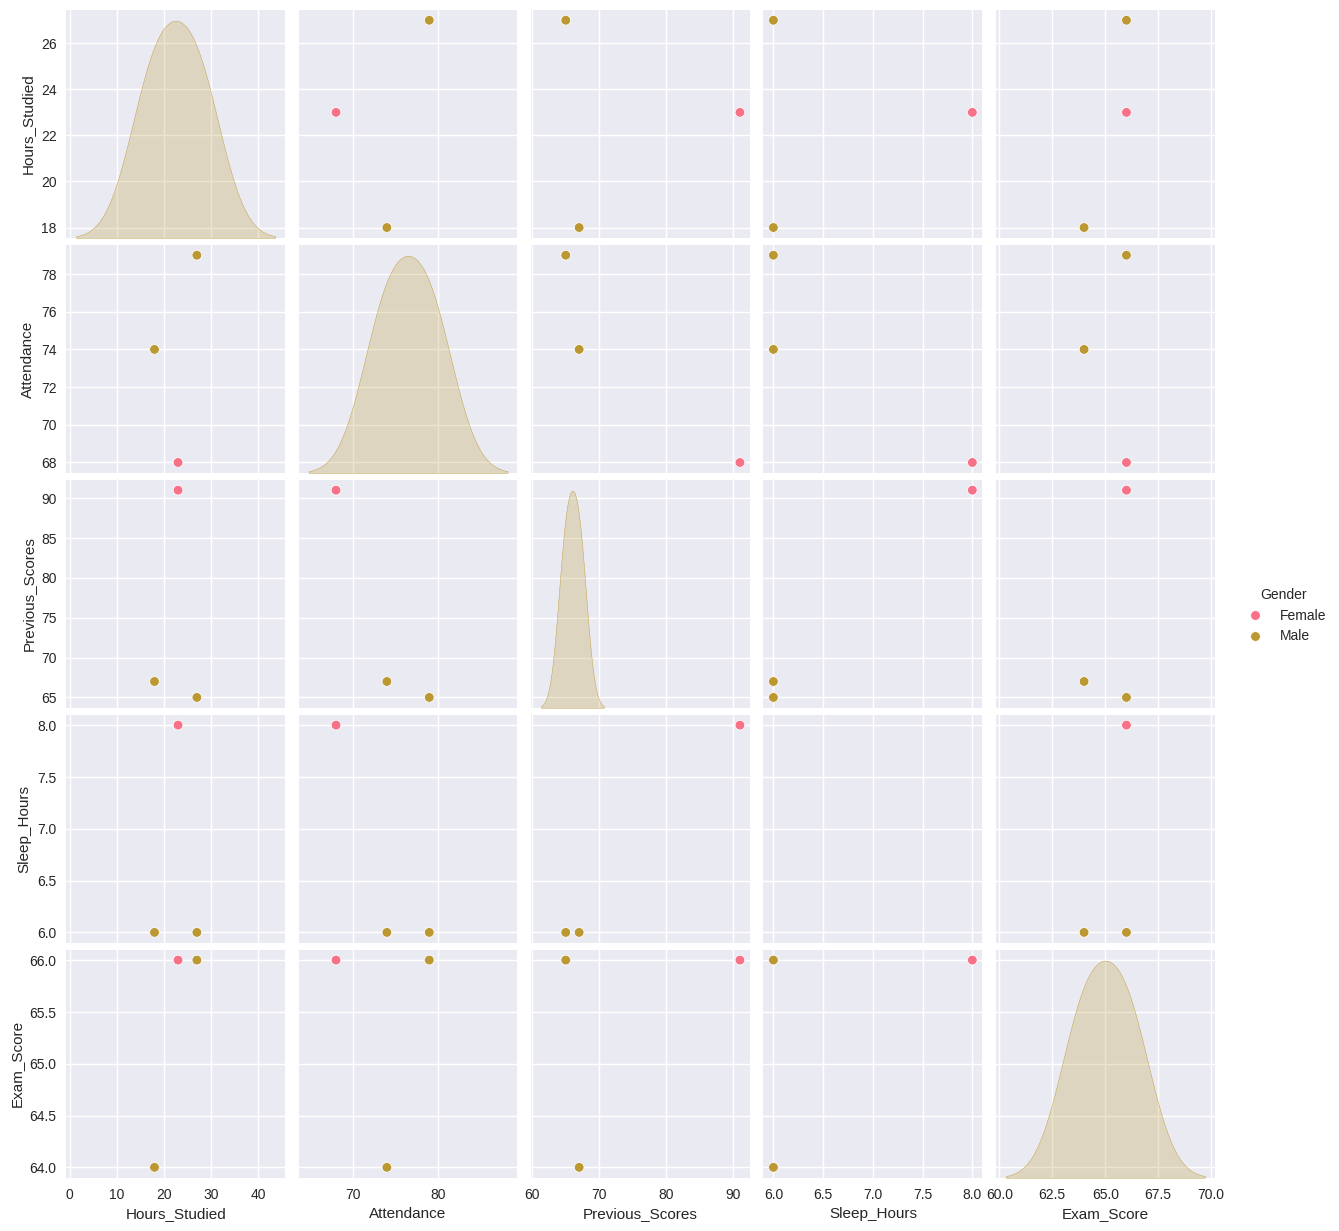

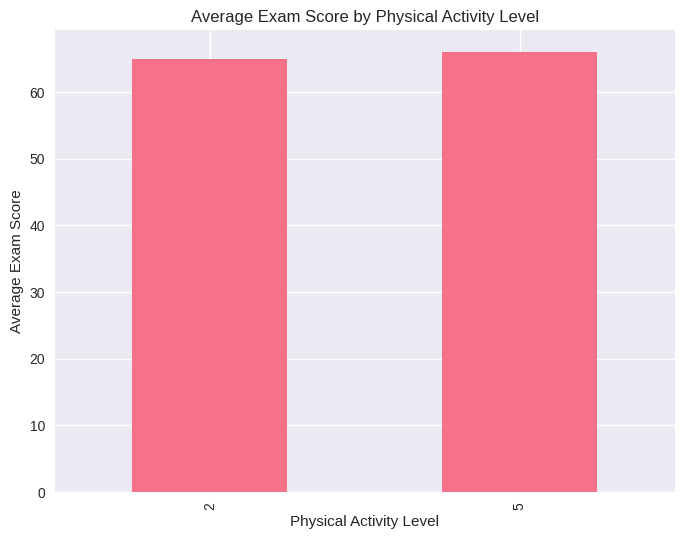

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the CSV data (assuming you have saved the cleaned data as CSV)
df = pd.read_csv('/content/cleaned_data.csv')

# Set the style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with subplots
plt.figure(figsize=(20, 15))

# 1. Hours Studied vs Exam Score (Scatter plot)
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Gender')
plt.title('Hours Studied vs Exam Score')

# 2. Average Exam Score by Parental Education Level (Bar plot)
plt.subplot(2, 2, 2)
df.groupby('Parental_Education_Level')['Exam_Score'].mean().plot(kind='bar')
plt.title('Average Exam Score by Parental Education')
plt.xticks(rotation=45)

# 3. Distribution of Exam Scores (Histogram)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Exam_Score', bins=20)
plt.title('Distribution of Exam Scores')

# 4. Sleep Hours vs Exam Score (Box plot)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Sleep_Hours', y='Exam_Score')
plt.title('Sleep Hours vs Exam Score')

plt.tight_layout()
plt.show()

# Additional visualizations using Plotly for interactive plots

# 5. Correlation Heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# 6. Interactive Scatter Plot using Plotly
fig = px.scatter(df,
                 x='Hours_Studied',
                 y='Exam_Score',
                 color='Gender',
                 size='Previous_Scores',
                 hover_data=['Attendance', 'Sleep_Hours'],
                 title='Interactive: Hours Studied vs Exam Score')
fig.show()

# 7. Box Plot for Exam Scores by School Type and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='School_Type', y='Exam_Score', hue='Gender')
plt.title('Exam Scores by School Type and Gender')
plt.show()

# 8. Violin Plot for Motivation Level vs Exam Score
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Motivation_Level', y='Exam_Score')
plt.title('Distribution of Exam Scores by Motivation Level')
plt.show()

# 9. Pair Plot for Key Variables
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score', 'Gender']],
             hue='Gender')
plt.show()

# 10. Average Exam Score by Physical Activity Level
plt.figure(figsize=(8, 6))
df.groupby('Physical_Activity')['Exam_Score'].mean().plot(kind='bar')
plt.title('Average Exam Score by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Average Exam Score')
plt.show()


# New section